## Flight ticket

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
train = pd.read_excel(r'Data_Train.xlsx')
test = pd.read_excel(r'Test_set.xlsx')

In [3]:
# first five rows and columns
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# checking the data dimension
train.shape

(10683, 11)

In [5]:
# data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
# finding the null values 
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# Statistical summary

In [7]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
train['Additional_Info'].unique()


array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

Text(0, 0.5, 'Price of ticket')

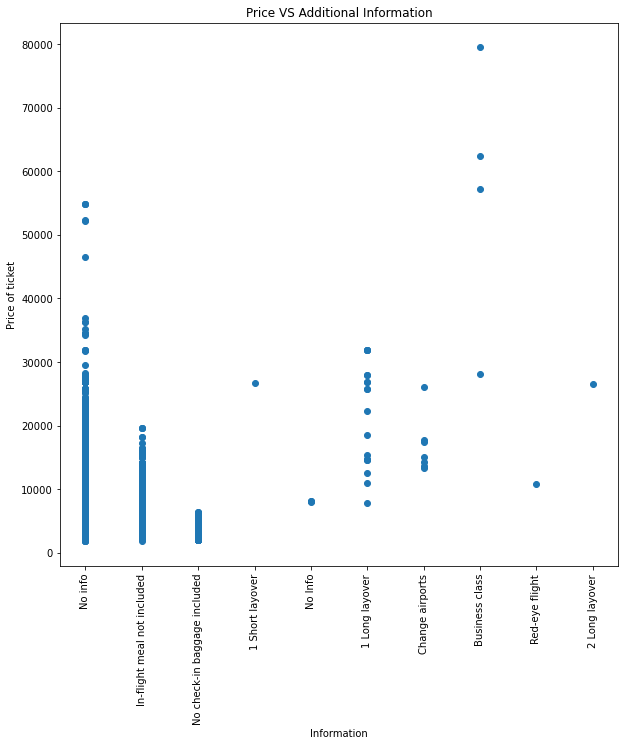

In [9]:
plt.figure(figsize = (10, 10))
plt.title('Price VS Additional Information')
plt.scatter(train['Additional_Info'],train['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

In [10]:
# drop the null values
train.dropna(inplace=True)

Converting the Date_of_journey into date, month and year.

In [11]:
#train['Journey_day']=pd.to_datetime(train.Date_of_Journey, format="%d/%m/%y" ).dt.day
train["Journey_day"] = pd.to_datetime(train.Date_of_Journey, format="%d/%m/%Y").dt.day
train["Journey_month"] = pd.to_datetime(train["Date_of_Journey"], format = "%d/%m/%Y").dt.month


In [12]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


## Data Visualization

Text(0, 0.5, 'Count of flights')

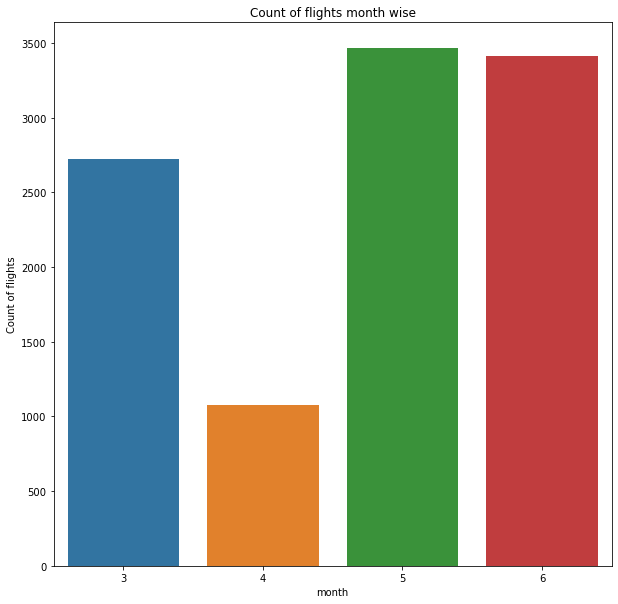

In [13]:
plt.figure(figsize = (10 , 10))
plt.title('Count of flights month wise')
sns.countplot(x = 'Journey_month', data = train)
plt.xlabel('month')
plt.ylabel('Count of flights')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

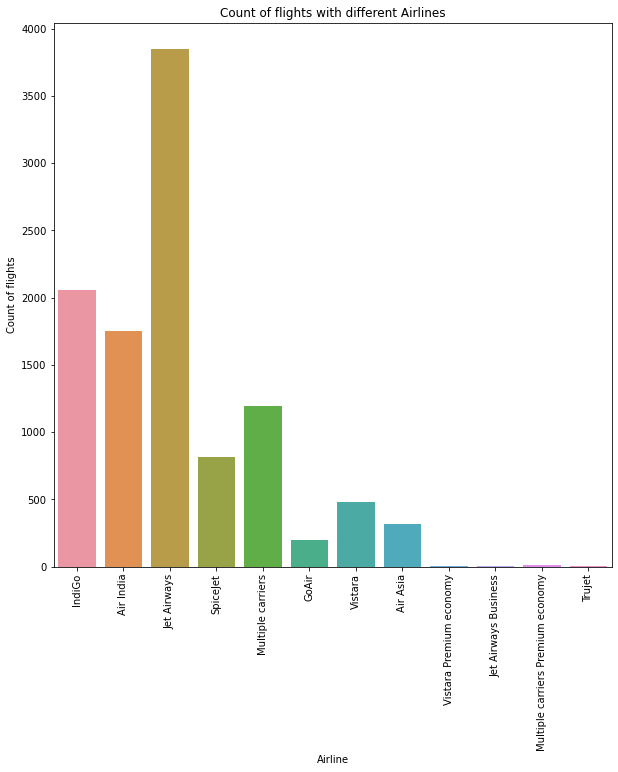

In [14]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Airline', data = train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

In [15]:
# drop the Date_of_Journey column
train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [16]:
# Extracting Hours
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour

# Extracting Minutes
train["Dep_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train.drop(["Dep_Time"], axis = 1, inplace = True)

In [17]:
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [18]:
# Extracting Hours
train["Arrival_hour"] = pd.to_datetime(train.Arrival_Time).dt.hour

# Extracting Minutes
train["Arrival_min"] = pd.to_datetime(train.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [19]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [20]:
duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [21]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [22]:
train["Duration_hours"] = duration_hours
train["Duration_mins"] = duration_mins

In [23]:
train.drop(["Duration"], axis = 1, inplace = True)

In [24]:
train.head()


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [25]:
train["Airline"].value_counts()


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

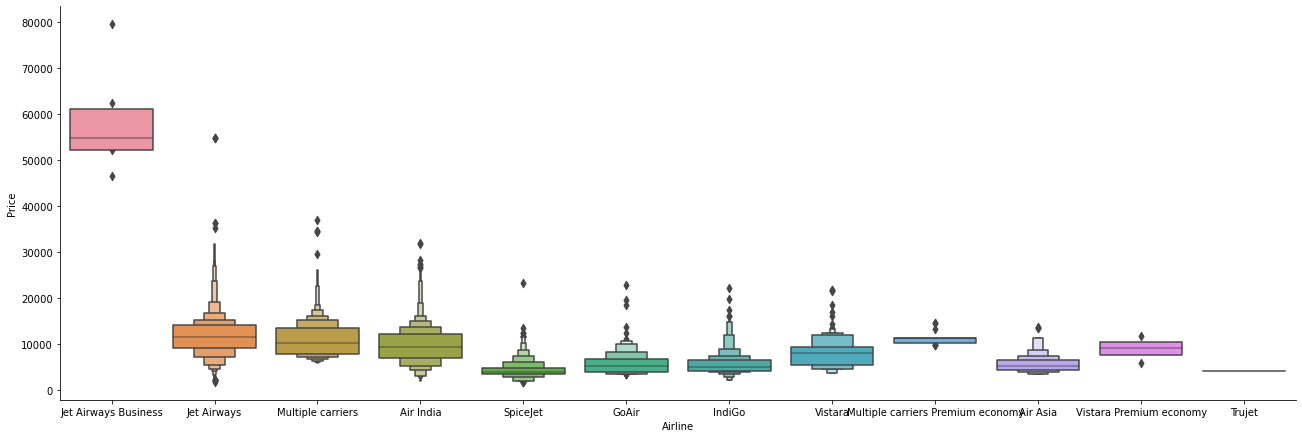

In [26]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()


In [27]:
Airline = train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [28]:
train["Source"].value_counts()


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

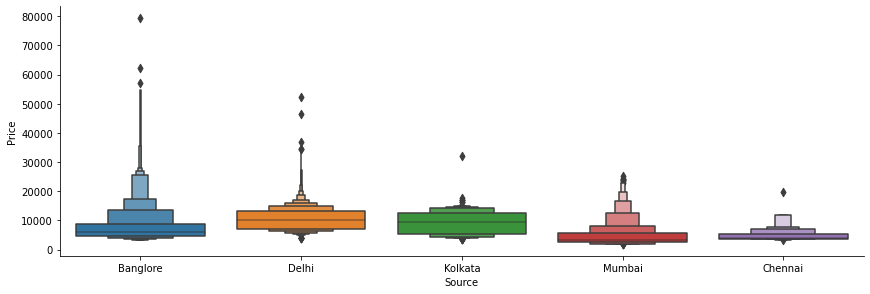

In [29]:
sns.catplot(y = "Price", x = "Source", data = train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [30]:
Source = train[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [31]:
train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [32]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [33]:
train["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [34]:
train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [35]:
train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [36]:
train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [37]:
train.head()


,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [38]:
data_train = pd.concat([train, Airline, Source, Destination], axis = 1)


In [39]:
data_train.head()


,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [40]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [41]:
data_train.head()


,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [42]:
data_train.shape


(10682, 30)

In [43]:
data_train.columns


Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [44]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

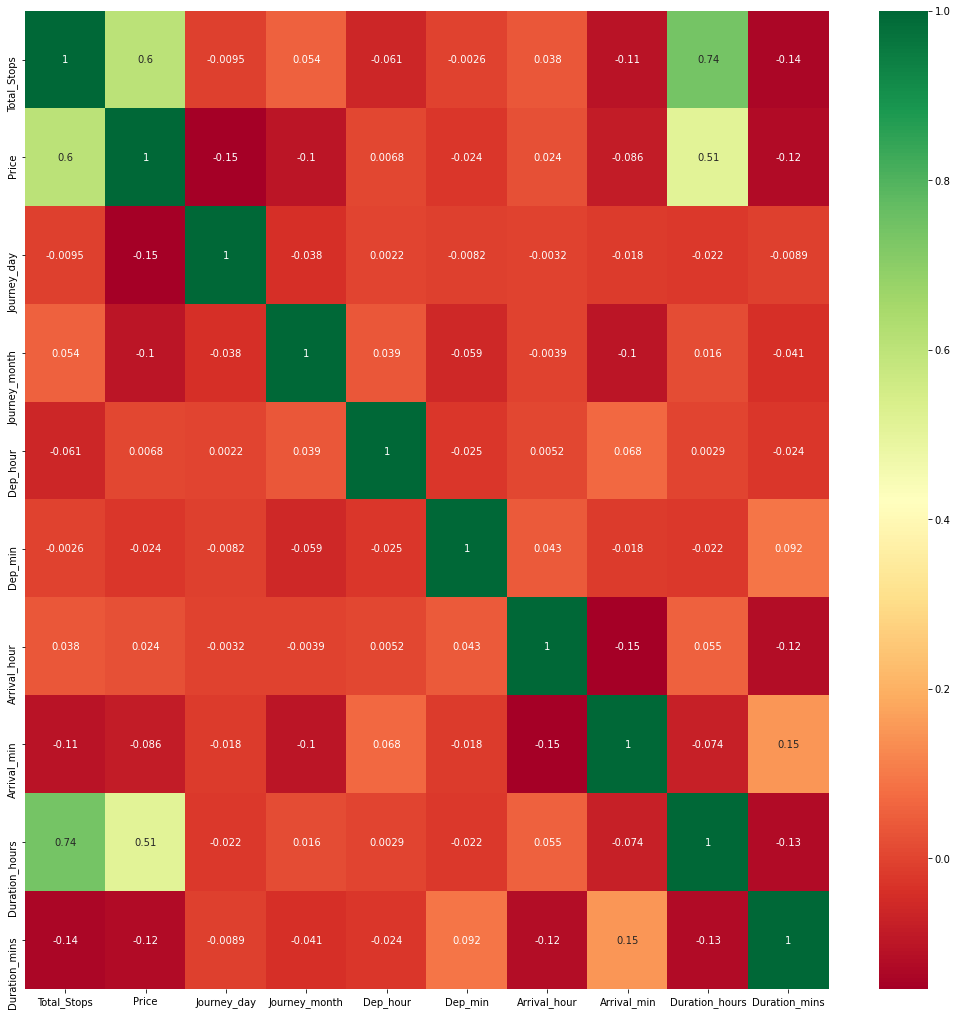

In [46]:
plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [47]:
 x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

# Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print("Predicted results price:",pred)
print("actual price ",y_test)

Predicted results price: [16749.28  5426.71  8945.56 ...  5849.46  3243.89  6987.85]
actual price  6075    16655
3544     4959
9291     9187
5032     3858
2483    12898
        ...  
7917    16263
5858    10844
2689     5000
4486     3100
7877     6734
Name: Price, Length: 3205, dtype: int64


In [49]:
#error:
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error :',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

Mean absolute error: 1162.8270852639905
Mean squared error : 4005128.5500857597
Root Mean Squared Error: 2001.2817268155325


# Linear Regression

In [50]:
lr = LinearRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print("Predicted results price:",predlr)
print("actual price ",y_test)

Predicted results price: [13462.67799456  7642.02488103  9556.33108707 ...  4770.28943266
  4837.04276965  7385.72563752]
actual price  6075    16655
3544     4959
9291     9187
5032     3858
2483    12898
        ...  
7917    16263
5858    10844
2689     5000
4486     3100
7877     6734
Name: Price, Length: 3205, dtype: int64


In [51]:
#error:
print('Mean absolute error:',mean_absolute_error(y_test,predlr))
print('Mean squared error :',mean_squared_error(y_test,predlr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predlr)))

Mean absolute error: 1937.8989872881193
Mean squared error : 7621946.5167306
Root Mean Squared Error: 2760.787300161061


# SVR

In [52]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
predsvr = svr.predict(x_test)
print("Predicted results price:",predsvr)
print("actual price ",y_test)

Predicted results price: [8334.45809824 8396.58359526 8328.69278122 ... 8237.40375753 8302.61324343
 8231.9354196 ]
actual price  6075    16655
3544     4959
9291     9187
5032     3858
2483    12898
        ...  
7917    16263
5858    10844
2689     5000
4486     3100
7877     6734
Name: Price, Length: 3205, dtype: int64


In [53]:
#error:
print('Mean absolute error:',mean_absolute_error(y_test,predsvr))
print('Mean squared error :',mean_squared_error(y_test,predsvr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predsvr)))

Mean absolute error: 3535.5200365887104
Mean squared error : 20300555.762681954
Root Mean Squared Error: 4505.613805319088


# Decision Tree Regressor

In [54]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print("Predicted results price:",preddt)
print("actual price ",y_test)

Predicted results price: [16840.  4959.  8452. ...  5601.  3100.  6704.]
actual price  6075    16655
3544     4959
9291     9187
5032     3858
2483    12898
        ...  
7917    16263
5858    10844
2689     5000
4486     3100
7877     6734
Name: Price, Length: 3205, dtype: int64


In [55]:
#error:
print('Mean absolute error:',mean_absolute_error(y_test,preddt))
print('Mean squared error :',mean_squared_error(y_test,preddt))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,preddt)))

Mean absolute error: 1363.7300364014561
Mean squared error : 6298160.79335916
Root Mean Squared Error: 2509.613674125793


## cross validation

In [56]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(lr,X , y, cv=5)
print("Cross validation score of linear Regression model :",scr.mean())

Cross validation score of linear Regression model : 0.6199027318916419


In [57]:
scr = cross_val_score(rf, X, y, cv=5)
print("Cross validation score of Random Forest model :", scr.mean())

Cross validation score of Random Forest model : 0.8116902237530566


In [ ]:
scr = cross_val_score(svr, X, y, cv=5)
print('Cross validation score of SVR model :', scr.mean())

In [ ]:
scr = cross_val_score(dt, X, y, cv=5)
print('Cross validation score of DecisionTreeRegression model :', scr.mean())

## saving the model

In [ ]:
import joblib
joblib.dump(dt,"flight_ticket")